6장 텍스트와 시퀀스를 위한 딥러닝
------

6장에서는 텍스트(단어의 시퀀스 또는 문자의 시퀀스), 시계열 또는 일반적인 시퀀스(sequence) 데이터를 처리할 수 있는 딥러닝 모델을 살펴볼 것이다.

시퀀스 데이터를 처리하는 기본적인 딥러닝 모델
- 순환 신경망(recurrent neural network)
- 1D 컨브넷(1D convnet)

어디에 사용할까?
- 문서 분류나 시계열 분류, 예를 들면 글의 주제나 책의 저자 식별하기
- 시계열 비교, 예를 들면 두 문서나 두 주식 가격이 얼마나 밀접하게 관련이 있는지 추정
- sequence to sequence, 예를 들면 영어 문장을 프랑스어로 변환하기
- 감성 분석, 긍정 부정 분류
- 시계열 예측, 예를 들어 어떤 지역의 치근 날씨 데이터가 주어졌을 때 향후 날씨 예측

### 6.1 텍스트 데이터 다루기

텍스트는 가장 흔한 sequence 형태의 데이터
- 단어의 sequence나 문자의 sequence로 이해할 수 있음
- 보통 단어 수준으로 작업하는 경우가 많음
- 기초적인 자연어 이해 문제를 해결할 수 있음
- 다양하게 사용

이런 모델은 문자 언어에 대한 통계적 구조를 만들어 간단한 텍스트 문제를 해결

다른 모든 신경망과 마찬가지로 텍스트 원본은 입력으로 사용 못 함
- 딥러닝은 수치형 텐서만 사용 가능하므로 텍스트를 수치형 텐서로 변환하는 과정을 텍스트 벡터화(vectorizing text)라고 함
  - 텍스트를 단어로 나누고 각 단어를 하나의 벡터로 변환
  - 텍스트를 문자로 나누고 각 문자를 하나의 벡터로 변환
  - 텍스트를 단어나 문자의 n-gram을 추출하여 각 n-그램을 하나의 벡터로 변환. n-그램은 연속된 단어나 문자의 그룹으로 텍스트에서 단어나 문자를 하나씩 이동하면서 추출
  
  
텍스트를 나누는 이런 단위(단어, 문자, n-그램)를 토큰(token)이라고 함
- 텍스트를 토큰으로 나누는 작업을 토큰화(tokenization)라고 함
- 모든 텍스트 벡터화 과정은 어떤 종류의 토큰화를 적용하고 생성된 토큰에 수치형 벡터를 연결하는 것으로 이루어짐
- 이런 벡터는 sequence 텐서로 묶여져서 심층 신경망에 넣어짐

토큰의 one-hot encoding 과 token embedding이 있다.

#### 6.1.1 단어와 문자의 원-핫 인코딩

one-hot encoding은 토큰을 벡터로 변환하는 가장 일반적이고 기본적인 방법
- 모든 단어에 고유한 정수 인덱스를 부여하고 이 정수 인덱스 i를 크기가 N(어휘 사전의 크기)인 이진 벡터로 변환
- 이 벡터는 i 번재 원소만 1이고 나머지는 모두 0이다.

In [1]:
import numpy as np

단어 수준의 원-핫 인코딩

In [2]:
samples = ['The cat sat on the mat.', 'The dog ate my homework.']

token_index = {}

for sample in samples:
    for word in sample.split():
        if word not in token_index:
            token_index[word] = len(token_index) + 1
            
max_length = 10

In [10]:
token_index

{'The': 1,
 'cat': 2,
 'sat': 3,
 'on': 4,
 'the': 5,
 'mat.': 6,
 'dog': 7,
 'ate': 8,
 'my': 9,
 'homework.': 10}

In [8]:
results = np.zeros(shape = (len(samples), max_length, max(token_index.values()) + 1))

In [9]:
results

array([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0

In [13]:
results.shape

(2, 10, 11)

In [11]:
for i, sample in enumerate(samples):
    for j, word in list(enumerate(sample.split()))[:max_length]:
        index = token_index.get(word)
        results[i, j, index] = 1.

In [12]:
results

array([[[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],

       [[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0

In [14]:
import string

samples = ['The cat sat on the mat.', 'The dog ate my homework.']
characters = string.printable  # 출력 가능한 모든 아스키(ASCII) 문자
token_index = dict(zip(characters, range(1, len(characters) + 1)))

max_length = 50
results = np.zeros((len(samples), max_length, max(token_index.values()) + 1))
for i, sample in enumerate(samples):
    for j, character in enumerate(sample[:max_length]):
        index = token_index.get(character)
        results[i, j, index] = 1.

In [16]:
characters

'0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~ \t\n\r\x0b\x0c'

In [15]:
results

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

케라스에는 원본 텍스트 데이터를 단어 또는 문자 수준의 원-핫 인코딩으로 변환해주는 유틸리티가 있습니다. 특수 문자를 제거하거나 빈도가 높은 N개의 단어만을 선택(입력 벡터 공간이 너무 커지지 않도록 하기 위한 일반적인 제한 방법입니다)하는 등 여러 가지 중요한 기능들이 있기 때문에 이 유틸리티를 사용하는 것이 좋습니다.

In [2]:
from keras.preprocessing.text import Tokenizer

Using TensorFlow backend.


In [22]:
samples = ['The cat sat on the mat.', 'The dog ate my homework.']

tokenizer = Tokenizer(num_words=1000)
tokenizer.fit_on_texts(samples) #단어 인덱스 구축

sequences = tokenizer.texts_to_sequences(samples) # 문자열을 정수 인덱스의 리스트로 변환

# 직접 원-핫 이진 벡터 표현을 얻을 수 있다. 원 - 핫 인코딩 외에 다른 벡터화 방법들도 제공
one_hot_results = tokenizer.texts_to_matrix(samples, mode='binary')

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 9 unique tokens.


In [24]:
tokenizer

In [23]:
sequences

[[1, 2, 3, 4, 1, 5], [1, 6, 7, 8, 9]]

In [25]:
one_hot_results

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [3]:
samples = ['The cat sat on the mat.', 'The dog ate my homework.', 'I love you and the book is great']

In [4]:
tokenizer = Tokenizer(num_words=1000)
tokenizer.fit_on_texts(samples) #단어 인덱스 구축

sequences = tokenizer.texts_to_sequences(samples) # 문자열을 정수 인덱스의 리스트로 변환

# 직접 원-핫 이진 벡터 표현을 얻을 수 있다. 원 - 핫 인코딩 외에 다른 벡터화 방법들도 제공
one_hot_results = tokenizer.texts_to_matrix(samples, mode='binary')

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 16 unique tokens.


In [5]:
sequences

[[1, 2, 3, 4, 1, 5], [1, 6, 7, 8, 9], [10, 11, 12, 13, 1, 14, 15, 16]]

In [31]:
# from pprint import pprint

In [6]:
print(len(one_hot_results[0]))
one_hot_results[0]

1000


array([0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

원-핫 인코딩의 변현 기법은 원-핫 해싱 기법
- 이 방식은 어휘 사전에 있는 고유한 토큰의 수가 너무 커서 모두 다루기 어려울 때 사용
- 각 단어에 명시적으로 인덱스를 할당하고 이 인덱스를 딕셔너리에 저장하는 대신에 단어를 해싱하여 고정된 크기의 벡터로 변환
- 일반적으로 간단한 해싱 함수 사용
- 이 방식의 주요 장점은 명시적인 단어 인덱스가 필요 없기 때문에 메모리를 절약하고 온라인 방식으로 데이터를 인코딩 할 수 있다.
  - 전체 데이터를 확인하지 않고 토큰 생성 가능
- 단점은 해시 충돌
  - 2개의 단어가 같은 해시를 만들면 이를 바라보는 머신 러닝 모델은 단어 사이의 차이를 인식하지 못 함
  - 해싱 공간의 차원이 해싱될 고유 토큰의 전체 개수보다 훨씬 크면 해시 충돌의 가능성은 감소

In [7]:
samples = ['The cat sat on the mat.', 'The dog ate my homework.']

# 단어를 크기가 1,000인 벡터로 저장합니다.
# 1,000개(또는 그이상)의 단어가 있다면 해싱 충돌이 늘어나고 인코딩의 정확도가 감소될 것입니다
dimensionality = 1000
max_length = 10

results = np.zeros((len(samples), max_length, dimensionality))

In [8]:
results

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

In [9]:
results.shape

(2, 10, 1000)

In [10]:
for i, sample in enumerate(samples):
    for j, word in list(enumerate(sample.split()))[:max_length]:
        # 단어를 해싱하여 0과 1,000 사이의 랜덤한 정수 인덱스로 변환합니다.
        index = abs(hash(word)) % dimensionality
        results[i, j, index] = 1.

In [11]:
results[0][0][0:10]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

해시 - python : https://comdoc.tistory.com/entry/17-%ED%95%B4%EC%8B%B1hashing-%ED%8C%8C%EC%9D%B4%EC%8D%AC

#### 6.1.2 단어 임베딩 사용하기

단어와 벡터를 연관 짓는 강력하고 인기 있는 또 다른 방법!

단어 임베딩
- word vector 사용
- 원 - 핫 인코딩으로 만든 벡터는 희소(sparse - 대부분 0으로 채워짐), 고차원
- 반면에 단어 임베딩은 저차원의 실수형 벡터(희소 벡터의 반대말이 밀집 단어 벡터 임)

단어 임베딩은 데이터로부터 학습됨
- 보통 256차, 512차원 또는 큰 어휘 사전을 다룰 때는 1,024 차원의 단어 임베딩 사용
- 보통 단어 임베딩이 더 많은 정보를 적은 차원에 저장

단어 임베딩은 어떻게 만드나요?
- (문서 분류나 감성 예측) 관심 대상인 문제와 함께 단어 임베딩을 학습, 이런 경우에는 랜덤한 단어 벡터로 시작해서 신경망의 가중치를 학습하는 것과 같은 방식으로 단어 벡터 학습
- 풀려는 문제가 아니고 다른 머신 러닝 작업에서 미리 계산된 단어 임베딩을 로드함 - 이를 pretrained word embedding 이라고 함

### Embedding 층을 사용하여 단어 임베딩 학습하기

단어와 밀집 벡터를 연관 짓는 가장 간단한 방법은 랜덤하게 벡터를 선택하는 것
- 이 방식의 문제점은 임베딩 공간이 구조적이지 않다는 것
- 예를 들어 accurate와 exact 단어는 대부분 문장에서 비슷한 의미로 사용되지만 완전히 다른 임베딩을 가짐
- 심층 신경망이 이런 임의의 구조적이지 않은 임베딩 공간을 이해하기는 어렵다.

단어 벡터 사이에 좀 더 추상적이고 기하학적인 관계를 얻으려면 단어 사이에 있는 의미 관계를 반영
- 단어 임베딩은 언어를 기하하적 공간에 매핑하는 것
- 잘 구축된 임베딩 공간에서는 동의어가 비슷한 단어 벡터로 임베딩 될 것
- 일반적으로 두 단어 벡터 사이의 거리(L2 거리)는 이 단어 사이의 의미 거리와 관계되어 있다.
- 거리 외에 임베딩 공간의 특정 방향도 의미를 가질 수 있다.

예를 보자!! - 책 참조

사람의 언어를 완벽하게 매핑해서 어떤 자연어 처리 작업에도 사용할 수 있는 이상적인 단어 임베딩 공간이 있을까?
- 언젠가는 될려나...
- 사람의 언어도 마찬가지.
- 영화 리뷰와 법률 문서의 임베딩 공간도 다를 것이다.

새로운 작업에는 새로운 임베딩을!
- 역전파를 이용하면 쉽게 만들 수 있고 케라스를 이용하면 더 쉽다
- embedding층의 가중치를 학습


word2vec - https://www.youtube.com/watch?v=sY4YyacSsLc

In [43]:
from keras.layers import Embedding

# 임베딩 층은 적어도 2개의 매개변수를 받음 - 가능한 토큰의 개수(여기선 1000으로 단어 인덱스 최댓값 + 1)와 임베딩 차원(64)
embedding_layer = Embedding(1000, 64)

임베딩 층을 특정 단어를 나타내는 정수 인덱스를 밀집 벡터로 매핑하는 딕셔너리로 이해하는 것이 가장 좋음
- 정수를 입력으로 받아 내부 딕셔너리에서 이 정수에 연관된 벡터를 찾아 반환
- 딕셔너리 탐색은 효율적으로 수행됨

단어 인덱스 -> 임베딩 층 -> 연관된 단어 벡터

임베딩 층

- 입력
  - 크기가 (samples, sequece_length)인 2D 정수 텐서를 입력으로 받음
  - 각 샘플은 정수의 시퀀스
  - 가변 길이의 시퀀스를 임베딩 할 수 있다.
- 반환
  - 크기가 (samples, sequece_length, embedding_dimensionality)인 3D 실수행 텐서를 반환
  - 이런 3D 텐서는 RNN이나 1D 합성곱 층에서 처리됨

임베딩 층의 객체를 생성할 때 가중치(토큰 벡터를 위한 내부 딕셔너리)는 다른 층과 마찬가지로 랜덤하게 초기화 됨
- 훈련하면서 이 단어 벡터는 역전파를 통해 점차 조정되어 이어지는 모델이 사용할 수 있도록 임베딩 공간 구성
- 훈련이 끝나면 임베딩 공간은 특정 문제에 특화된 구조를 많이 가지게 됨


영화 리뷰
- 데이터 셋
- 가장 빈도가 높은 1만 개의 단어를 추출
- 리뷰에서 20개가 넘는 단어 버림
- 이 네트워크는 1만 개의 단어에 대해 8차원의 임베딩을 학습하여 정수 시퀀스 입력을 임베딩 시퀀스로 바꿀 것
- 그 다음 텐서를 2D로 펼쳐서 분류를 위한 Dense 층을 훈련
  

In [12]:
from keras.datasets import imdb
from keras import preprocessing

max_features = 10000
maxlen = 20

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

/opt/conda/lib/python3.7/site-packages/keras/datasets/imdb.py:101: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/opt/conda/lib/python3.7/site-packages/keras/datasets/imdb.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [16]:
x_train[0][0:10]

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65]

In [19]:
x_train.shape, len(x_train[0])

((25000,), 218)

In [20]:
# 리스트를 (samples, maxlen) 크기의 2D 정수 텐서로 변환

x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)

In [23]:
x_train[0]

array([  65,   16,   38, 1334,   88,   12,   16,  283,    5,   16, 4472,
        113,  103,   32,   15,   16, 5345,   19,  178,   32], dtype=int32)

In [24]:
x_train.shape

(25000, 20)

Embedding 층에 input_length를 지정하지 않으면 출력 텐서의 차원이 (None, None, 8)이 됨
- Flatten 층을 사용하려면 첫 번째 배치 차원을 제외하고 나머지 차원이 결정되어야 하므로 input_length를 지정하여 (None, 20, 8)로 만듬

In [25]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding

model = Sequential()
# 나중에 임베딩된 입력을 Flatten 층에서 펼치기 위해 Embedding 층에 input_length를 지정합니다.
model.add(Embedding(10000, 8, input_length=maxlen))

# Embedding 층의 출력 크기는 (samples, maxlen, 8)

# 3D 임베딩 텐서를 (samples, maxlen * 8) 크기의 2D 텐서로 펼칩니다.
model.add(Flatten())

model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 20, 8)             80000     
_________________________________________________________________
flatten_1 (Flatten)          (None, 160)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 161       
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________


In [27]:
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

/opt/conda/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 1s 74us/step - loss: 0.6783 - acc: 0.5924 - val_loss: 0.6388 - val_acc: 0.6880
Epoch 2/10
20000/20000 [==============================] - 1s 57us/step - loss: 0.5562 - acc: 0.7494 - val_loss: 0.5312 - val_acc: 0.7272
Epoch 3/10
20000/20000 [==============================] - 1s 56us/step - loss: 0.4652 - acc: 0.7886 - val_loss: 0.5031 - val_acc: 0.7440
Epoch 4/10
20000/20000 [==============================] - 1s 57us/step - loss: 0.4238 - acc: 0.8083 - val_loss: 0.4949 - val_acc: 0.7508
Epoch 5/10
20000/20000 [==============================] - 1s 63us/step - loss: 0.3966 - acc: 0.8227 - val_loss: 0.4961 - val_acc: 0.7506
Epoch 6/10
20000/20000 [==============================] - 1s 55us/step - loss: 0.3757 - acc: 0.8354 - val_loss: 0.4996 - val_acc: 0.7524
Epoch 7/10
20000/20000 [==============================] - 1s 58us/step - loss: 0.3570 - acc: 0.8461 - val_loss: 0.5063 - val_acc:

결과 해석
- 약 75%의 acc
- 리뷰에서20개의 단어만 사용한 것치고 무난
- 하지만 임베딩 시퀀스를 펼치고 하나의 Dense 층을 훈련 했으므로 입력 시퀀스에 있는 각 단어를 독립적으로 다룸
- 단어 사이의 관계나 문장 구조를 고려하지 않음
- 각 시퀀스 전체를 고려한 특성을 학습하도록 임베딩 층 위에 순환 층이나 1D convD 층을 추가하는 것이 좋음

곧 살펴볼거임

### 사전 훈련된 단어 임베딩 사용
- 미리 만들어진 것을 사용하자
- 자연어 처리에서 사전 훈련된 단어 임베딩을 사용하는 이유는 이미지 분류 문제에서 사전 훈련된 컨브넷을 사용하는 이유와 거의 동일
- 꽤 일반적인 특성이 필요...

복붙함

> 단어 임베딩은 일반적으로 (문장이나 문서에 같이 등장하는 단어를 관찰하는) 단어 출현 통계를 사용하여 계산됩니다. 여기에는 여러 가지 기법이 사용되는데 신경망을 사용하는 것도 있고 그렇지 않은 방법도 있습니다. 단어를 위해 밀집된 저차원 임베딩 공간을 비지도 학습 방법으로 계산하는 아이디어는 요슈아 벤지오 등이 2000년대 초에 조사했습니다. 연구나 산업 애플리케이션에 적용되기 시작된 것은 Word2vec 알고리즘이 등장한 이후입니다. 이 알고리즘은 2013년 구글의 토마스 미코로프가 개발하였으며 가장 유명하고 성공적인 단어 임베딩 방법입니다. Word2vec의 차원은 성별 같은 구체적인 의미가 있는 속성을 잡아냅니다.

> 케라스의 Embedding 층을 위해 내려받을 수 있는 미리 계산된 단어 임베딩 데이터베이스가 여럿 있습니다. Word2vec은 그 중 하나입니다. 인기 있는 또 다른 하나는 2014년 스탠포드 대학의 연구자들이 개발한 GloVe(Global Vectors for Word Representation)입니다. 이 임베딩 기법은 단어의 동시 출현 통계를 기록한 행렬을 분해하는 기법을 사용합니다. 이 개발자들은 위키피디아 데이터와 커먼 크롤 데이터에서 가져온 수백만 개의 영어 토큰에 대해서 임베딩을 미리 계산해 놓았습니다.

> GloVe 임베딩을 케라스 모델에 어떻게 사용하는지 알아보죠. Word2vec 임베딩이나 다른 단어 임베딩 데이터베이스도 방법은 같습니다. 앞서 보았던 텍스트 토큰화 기법도 다시 살펴보겠습니다. 원본 텍스트에서 시작해서 완전한 모델을 구성해 보겠습니다.




#### 6.1.3 모든 내용을 적용하기 : 원본 텍스트에서 단어 임베딩까지

- 문장들을 벡터의 시퀀스로 임베딩하고 펼친 후 그 위에 Dense 층을 훈련
- 여기서는 사전 훈련된 단어 임베딩 사용
- 케라스에 포함된 IMDB 데이터는 미리 토큰화가 되어 있음(!!!)
- 이를 사용하슨 ㄴ대신 원본 텍스트 데이터를 내려 받아 처음부터 시작!

In [28]:
import os

imdb_dir = 'aclImdb'
train_dir = os.path.join(imdb_dir, 'train')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
    
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            with open(os.path.join(dir_name, fname), encoding='utf8') as file:
                texts.append(file.read())
        
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

texts 출력 금지...--;;

In [ ]:
### 

In [29]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

In [32]:
maxlen = 100  # 100개 단어 이후는 버립니다
training_samples = 200  # 훈련 샘플은 200개입니다
validation_samples = 10000  # 검증 샘플은 10,000개입니다
max_words = 10000  # 데이터셋에서 가장 빈도 높은 10,000개의 단어만 사용합니다

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('%s개의 고유한 토큰을 찾았습니다.' % len(word_index))

# 리스트를 (samples, maxlen) 크기의 2D 정수 텐서로 변환
data = pad_sequences(sequences, maxlen=maxlen)

88582개의 고유한 토큰을 찾았습니다.


In [34]:
labels = np.asarray(labels)
print('데이터 텐서의 크기:', data.shape)
print('레이블 텐서의 크기:', labels.shape)

데이터 텐서의 크기: (25000, 100)
레이블 텐서의 크기: (25000,)


In [36]:
data[0]

array([ 126,  327,    7,    7,    5,   27, 1199,    2, 1414,   11,    6,
         28,    4,    1,  246,  354,    2,  375, 7364,  123,   90,   10,
        188,  132,  229,   49,   41,   11,  415,    4,  592,   85,   47,
         23, 1196,  539,  841,   12,   97,  373,   42,   90,   31, 1618,
         19, 1184,    7,    7,    1,  338,  136,   23,  524,  375,    1,
        111,    6,  817,   49,  653,    8, 2640,   12,    9, 6538, 3899,
         36, 6041,    7,    7,    5,   94,  180,   57,  430,   11,  215,
          3,   17,   35,   75,   12,   42,   49,   42,   40, 1041,   75,
          7,    7, 4760,  800,    5,   78,   38,  115,   18,    9,  283,
        192], dtype=int32)

In [35]:
# 데이터를 훈련 세트와 검증 세트로 분할합니다.
# 샘플이 순서대로 있기 때문에 (부정 샘플이 모두 나온 후에 긍정 샘플이 옵니다) 
# 먼저 데이터를 섞습니다.

indices = np.arange(data.shape[0])

In [150]:
indices

array([    0,     1,     2, ..., 24997, 24998, 24999])

In [37]:
# index로 각각을 매핑

np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

In [39]:
data[0]

array([   8,   12,    1,  104,  290,  552,   68,   70,  915,   12,  109,
          1,  230,   12,  253, 1994,    2,  214,   96,   75,    1,   62,
         13,   35,  354,   21, 2230,   41,    1,   62,   10,  694,  161,
          4, 1994,  156,    1,   17,   35,   10,  158,  121,   48,    5,
        532,   10,  194,    9,   59,   27,  139,   37,  348,  129, 1282,
         39,    1, 7182,   18,   86,  352,   10,   13,    1,  223,   17,
         13,   40,  661,  661,    2,  661,   41,   65, 1630,    2, 1243,
          1,   61,  645,  136,   68,    1, 2182,  118,    1, 1243,   59,
       1581,   24, 7882,   12,   13,    1,   61,  599,   10,  185,   36,
         11], dtype=int32)

In [40]:
x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = lables[training_samples: training_samples + validation_samples]

#### 임베딩 전처리

단어와 이에 상응하는 벡터 표현(즉, 숫자 벡터)를 매핑하는 인덱스를 만듬

In [41]:
glove_dir = './datasets/'

embeddings_index = {}

# .100d, .200d 숫자는 차원을 의미함
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'), encoding="utf8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('%s개의 단어 벡터를 찾았습니다.' % len(embeddings_index))

400000개의 단어 벡터를 찾았습니다.


In [45]:
line

'sandberger 0.28365 -0.6263 -0.44351 0.2177 -0.087421 -0.17062 0.29266 -0.024899 0.26414 -0.17023 0.25817 0.097484 -0.33103 -0.43859 0.0095799 0.095624 -0.17777 0.38886 0.27151 0.14742 -0.43973 -0.26588 -0.024271 0.27186 -0.36761 -0.24827 -0.20815 0.22128 -0.044409 0.021373 0.24594 0.26143 0.29303 0.13281 0.082232 -0.12869 0.1622 -0.22567 -0.060348 0.28703 0.11381 0.34839 0.3419 0.36996 -0.13592 0.0062694 0.080317 0.0036251 0.43093 0.01882 0.31008 0.16722 0.074112 -0.37745 0.47363 0.41284 0.24471 0.075965 -0.51725 -0.49481 0.526 -0.074645 0.41434 -0.1956 -0.16544 -0.045649 -0.40153 -0.13136 -0.4672 0.18825 0.2612 0.16854 0.22615 0.62992 -0.1288 0.055841 0.01928 0.024572 0.46875 0.2582 -0.31672 0.048591 0.3277 -0.50141 0.30855 0.11997 -0.25768 -0.039867 -0.059672 0.5525 0.13885 -0.22862 0.071792 -0.43208 0.5398 -0.085806 0.032651 0.43678 -0.82607 -0.15701\n'

In [46]:
coefs

array([ 0.28365  , -0.6263   , -0.44351  ,  0.2177   , -0.087421 ,
       -0.17062  ,  0.29266  , -0.024899 ,  0.26414  , -0.17023  ,
        0.25817  ,  0.097484 , -0.33103  , -0.43859  ,  0.0095799,
        0.095624 , -0.17777  ,  0.38886  ,  0.27151  ,  0.14742  ,
       -0.43973  , -0.26588  , -0.024271 ,  0.27186  , -0.36761  ,
       -0.24827  , -0.20815  ,  0.22128  , -0.044409 ,  0.021373 ,
        0.24594  ,  0.26143  ,  0.29303  ,  0.13281  ,  0.082232 ,
       -0.12869  ,  0.1622   , -0.22567  , -0.060348 ,  0.28703  ,
        0.11381  ,  0.34839  ,  0.3419   ,  0.36996  , -0.13592  ,
        0.0062694,  0.080317 ,  0.0036251,  0.43093  ,  0.01882  ,
        0.31008  ,  0.16722  ,  0.074112 , -0.37745  ,  0.47363  ,
        0.41284  ,  0.24471  ,  0.075965 , -0.51725  , -0.49481  ,
        0.526    , -0.074645 ,  0.41434  , -0.1956   , -0.16544  ,
       -0.045649 , -0.40153  , -0.13136  , -0.4672   ,  0.18825  ,
        0.2612   ,  0.16854  ,  0.22615  ,  0.62992  , -0.1288

In [48]:
embeddings_index['sandberger']

array([ 0.28365  , -0.6263   , -0.44351  ,  0.2177   , -0.087421 ,
       -0.17062  ,  0.29266  , -0.024899 ,  0.26414  , -0.17023  ,
        0.25817  ,  0.097484 , -0.33103  , -0.43859  ,  0.0095799,
        0.095624 , -0.17777  ,  0.38886  ,  0.27151  ,  0.14742  ,
       -0.43973  , -0.26588  , -0.024271 ,  0.27186  , -0.36761  ,
       -0.24827  , -0.20815  ,  0.22128  , -0.044409 ,  0.021373 ,
        0.24594  ,  0.26143  ,  0.29303  ,  0.13281  ,  0.082232 ,
       -0.12869  ,  0.1622   , -0.22567  , -0.060348 ,  0.28703  ,
        0.11381  ,  0.34839  ,  0.3419   ,  0.36996  , -0.13592  ,
        0.0062694,  0.080317 ,  0.0036251,  0.43093  ,  0.01882  ,
        0.31008  ,  0.16722  ,  0.074112 , -0.37745  ,  0.47363  ,
        0.41284  ,  0.24471  ,  0.075965 , -0.51725  , -0.49481  ,
        0.526    , -0.074645 ,  0.41434  , -0.1956   , -0.16544  ,
       -0.045649 , -0.40153  , -0.13136  , -0.4672   ,  0.18825  ,
        0.2612   ,  0.16854  ,  0.22615  ,  0.62992  , -0.1288

그다음 Embedding 층에 주입할 수 있도록 임베딩 행렬을 만듭니다. 이 행렬의 크기는 (max_words, embedding_dim)이어야 합니다. 이 행렬의 i번째 원소는 (토큰화로 만든) 단어 인덱스의 i번째 단어에 상응하는 embedding_dim 차원 벡터입니다. 인덱스 0은 어떤 단어나 토큰도 아닐 경우를 나타냅니다.

In [53]:
embedding_dim = 100

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    
    if i < max_words:
        if embedding_vector is not None:
            # 임베딩 인덱스에 없는 단어는 모두 0이 됩니다.
            embedding_matrix[i] = embedding_vector

In [54]:
embedding_matrix.shape

(10000, 100)

In [55]:
embedding_matrix[300]

array([ 0.027587  , -0.47499999, -0.22745   ,  0.033388  ,  0.24517   ,
        0.15746   ,  0.47597   ,  0.22717001,  0.064186  , -0.024291  ,
        0.44207001,  0.090494  ,  0.24425   ,  0.33906999,  0.38284999,
       -0.53759998,  0.46814999, -0.063625  , -0.70665997, -0.21427999,
        0.234     , -0.50603998,  0.17174   ,  0.43377   ,  0.22311001,
       -0.23438001, -0.21264   , -0.39855999,  0.55372   ,  0.46415001,
       -0.14084999,  0.59065002, -0.69252002,  0.26242   , -0.23958001,
        0.35126999, -0.19809   , -0.072761  , -0.29886001, -0.28567001,
       -0.91970998, -0.35141   ,  0.20029999, -0.060185  ,  0.1837    ,
       -0.017188  ,  0.057039  , -0.46265   ,  0.79540002, -0.41626999,
       -0.067855  , -0.057482  ,  0.61104   ,  1.03240001, -0.19426   ,
       -2.5940001 , -0.95113999, -0.28406   ,  1.00610006,  1.08089995,
       -0.11912   ,  1.06400001, -0.24482   ,  0.43649   ,  0.77034003,
       -0.59828001,  0.014552  ,  0.48963001,  0.0028154 ,  0.36

In [56]:
embedding_matrix[300].shape

(100,)

#### 모델 정의하기

In [57]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, Flatten

In [58]:
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_2 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


#### 모델에 Glove 임베딩 로드하기

임베딩 층은 하나의 가중치 행렬을 가짐
- 이 행렬은 2D 부동 소수 행렬이고 각 i 번째 원소는 i 번째 인덱스에 상응하는 단어 벡터
- 모델의 첫 번째 층은 임베딩 층에 준비된 Glove 행렬을 로드!!!

In [59]:
# set_weights() 메서드는 넘파이 배열의 리스트를 매개변수로 받음
# 전달된 넘파이 배열로 층의 가중치를 설정
# 넘파이 배열의 순서와 크기는 층의 weights 속성과 동일해야 함
# Embedding 층은 가중치가 하나(편향이 없음)

model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

추가적으로 Embedding 층을 동결합니다(trainable 속성을 False로 설정합니다). 사전 훈련된 컨브넷 특성을 사용할 때와 같은 이유입니다. 모델의 일부는 (Embedding 층처럼) 사전 훈련되고 다른 부분은 (최상단 분류기처럼) 랜덤하게 초기화되었다면 훈련하는 동안 사전 훈련된 부분이 업데이트되면 안됩니다. 이미 알고 있던 정보를 모두 잃게 됩니다. 랜덤하게 초기화된 층에서 대량의 그래디언트 업데이트가 발생하면 이미 학습된 특성을 오염시키기 때문입니다.

#### 모델 훈련과 평가

In [60]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))
model.save_weights('pre_trained_glove_model.h5')

Train on 200 samples, validate on 10000 samples
Epoch 1/10
200/200 [==============================] - 1s 3ms/step - loss: 1.5155 - acc: 0.5450 - val_loss: 2.0448 - val_acc: 0.0011
Epoch 2/10
200/200 [==============================] - 0s 2ms/step - loss: 0.6524 - acc: 0.6350 - val_loss: 0.4006 - val_acc: 0.9966
Epoch 3/10
200/200 [==============================] - 1s 3ms/step - loss: 0.4692 - acc: 0.7800 - val_loss: 0.7699 - val_acc: 0.4670
Epoch 4/10
200/200 [==============================] - 0s 2ms/step - loss: 0.5798 - acc: 0.7750 - val_loss: 0.7795 - val_acc: 0.4526
Epoch 5/10
200/200 [==============================] - 0s 2ms/step - loss: 0.2480 - acc: 0.9250 - val_loss: 0.6711 - val_acc: 0.5892
Epoch 6/10
200/200 [==============================] - 0s 2ms/step - loss: 0.1593 - acc: 0.9600 - val_loss: 3.7265 - val_acc: 0.0016
Epoch 7/10
200/200 [==============================] - 0s 2ms/step - loss: 0.2252 - acc: 0.9250 - val_loss: 0.4878 - val_acc: 0.7655
Epoch 8/10
200/200 [========

In [61]:
import matplotlib.pyplot as plt

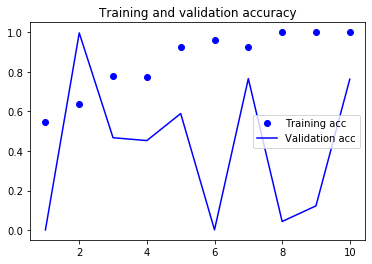

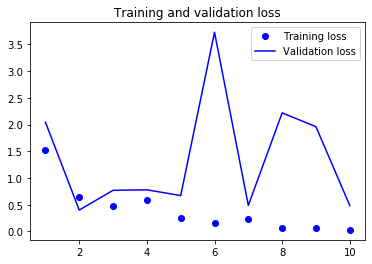

In [62]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

훈련 샘플 수가 적기 때문에 성능이 들쭉 날쭉 한 것으로 보임

사전 훈련된 단어 임베딩을 사용하지 않거나 임베딩 층을 동결하지 않고도 사용할 수 있음
- 이런 경우 해당 작업에 특화된 입력 토큰의 임베딩을 학습할 것
- 데이터가 풍부하게 있다면 결과 좋을거임
- 200개이지만 한 번 해봅시다.

In [63]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_3 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


/opt/conda/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 200 samples, validate on 10000 samples
Epoch 1/10
200/200 [==============================] - 1s 5ms/step - loss: 0.6937 - acc: 0.5050 - val_loss: 0.6988 - val_acc: 0.3847
Epoch 2/10
200/200 [==============================] - 1s 3ms/step - loss: 0.4804 - acc: 0.9950 - val_loss: 0.7824 - val_acc: 0.2087
Epoch 3/10
200/200 [==============================] - 1s 3ms/step - loss: 0.2524 - acc: 0.9950 - val_loss: 0.8400 - val_acc: 0.2219
Epoch 4/10
200/200 [==============================] - 1s 3ms/step - loss: 0.1067 - acc: 1.0000 - val_loss: 0.7221 - val_acc: 0.4673
Epoch 5/10
200/200 [==============================] - 0s 2ms/step - loss: 0.0477 - acc: 1.0000 - val_loss: 0.8239 - val_acc: 0.3227
Epoch 6/10
200/200 [==============================] - 0s 2ms/step - loss: 0.0252 - acc: 1.0000 - val_loss: 0.7883 - val_acc: 0.4005
Epoch 7/10
200/200 [==============================] - 0s 2ms/step - loss: 0.0140 - acc: 1.0000 - val_loss: 0.8029 - val_acc: 0.4000
Epoch 8/10
200/200 [========

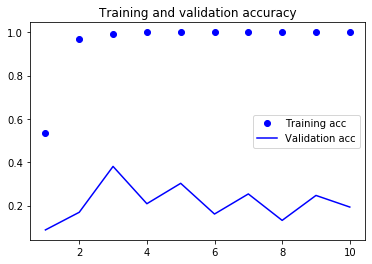

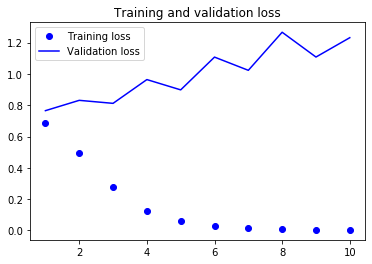

In [95]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

아..망했어요
- 사전 훈련된 걸 씁시다. ㅠ.ㅠ

마지막으로 테스트 데이터에서 모델을 평가
- 우선 테스트 데이터를 토큰화

In [65]:
test_dir = os.path.join(imdb_dir, 'test')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(test_dir, label_type)
    for fname in sorted(os.listdir(dir_name)):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname), encoding="utf8")
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

sequences = tokenizer.texts_to_sequences(texts)
x_test = pad_sequences(sequences, maxlen=maxlen)
y_test = np.asarray(labels)

In [66]:
x_test[0]

array([ 300,   31,   60,   55,   10,  119,   21,  456,    1,  106,   72,
        141,   63,  456,   41,    6,    3,   52, 9381,    1,  436,    6,
         26,  263,  122,   14,  550,   34, 1287,  237,  125,   71,  256,
        331,  184,   87,    2,  284,   54, 4103,    4,    3, 4227,   24,
         61,  735,    5,   27, 1570,  117,  414,   51,   72,   23,   70,
        498,    1,  317,   93,  210,    4,   11, 4214,  713,  175,   29,
         41, 2738,   72,   23,  576,  135,    6, 2170,    5,   27,    1,
        115,   16,   54, 2601,   39,   54, 1234,  130,    9,   13,   29,
         10,   97,   78,    5,  398,   36, 1584,    9,  122,   32,  531,
          8], dtype=int32)

In [67]:
model.load_weights('pre_trained_glove_model.h5')
model.evaluate(x_test, y_test)

25000/25000 [==============================] - 1s 47us/step


[0.9063455509757996, 0.5564000010490417]

-------------

2000개 정도의샘플로 테스트를 해보자

In [68]:
import os

imdb_dir = 'aclImdb'
train_dir = os.path.join(imdb_dir, 'train')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
    
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            with open(os.path.join(dir_name, fname), encoding='utf8') as file:
                texts.append(file.read())
        
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

In [69]:
maxlen = 100  # 100개 단어 이후는 버립니다
training_samples = 2000  # 훈련 샘플은 2000개입니다
validation_samples = 10000  # 검증 샘플은 10,000개입니다
max_words = 10000  # 데이터셋에서 가장 빈도 높은 10,000개의 단어만 사용합니다

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('%s개의 고유한 토큰을 찾았습니다.' % len(word_index))

data = pad_sequences(sequences, maxlen=maxlen)

labels = np.asarray(labels)
print('데이터 텐서의 크기:', data.shape)
print('레이블 텐서의 크기:', labels.shape)

# 데이터를 훈련 세트와 검증 세트로 분할합니다.
# 샘플이 순서대로 있기 때문에 (부정 샘플이 모두 나온 후에 긍정 샘플이 옵니다) 
# 먼저 데이터를 섞습니다.
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

88582개의 고유한 토큰을 찾았습니다.
데이터 텐서의 크기: (25000, 100)
레이블 텐서의 크기: (25000,)


In [70]:
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_4 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


In [71]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

In [72]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))
model.save_weights('pre_trained_glove_model_2000_samples.h5')

Train on 2000 samples, validate on 10000 samples
Epoch 1/10
2000/2000 [==============================] - 1s 378us/step - loss: 0.7587 - acc: 0.5180 - val_loss: 0.6918 - val_acc: 0.5136
Epoch 2/10
2000/2000 [==============================] - 1s 342us/step - loss: 0.6862 - acc: 0.5810 - val_loss: 0.6825 - val_acc: 0.5231
Epoch 3/10
2000/2000 [==============================] - 1s 346us/step - loss: 0.6900 - acc: 0.6105 - val_loss: 0.6494 - val_acc: 0.6233
Epoch 4/10
2000/2000 [==============================] - 1s 348us/step - loss: 0.5018 - acc: 0.7700 - val_loss: 0.7455 - val_acc: 0.5743
Epoch 5/10
2000/2000 [==============================] - 1s 363us/step - loss: 0.4111 - acc: 0.8115 - val_loss: 0.7016 - val_acc: 0.6198
Epoch 6/10
2000/2000 [==============================] - 1s 467us/step - loss: 0.3252 - acc: 0.8665 - val_loss: 0.7586 - val_acc: 0.6121
Epoch 7/10
2000/2000 [==============================] - 1s 386us/step - loss: 0.2452 - acc: 0.9130 - val_loss: 0.8008 - val_acc: 0.6299

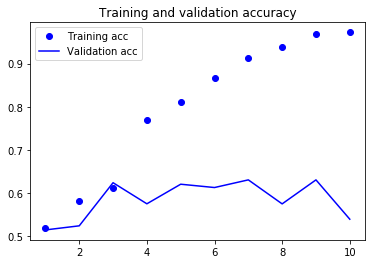

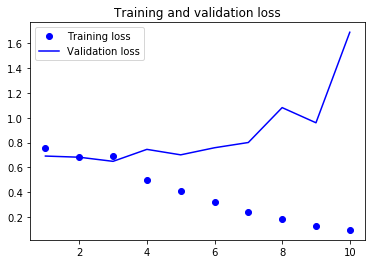

In [73]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

2000개로 하니까 조금 더 나아진 듯?

### 6.2 순환 신경망 이해하기

기존의 신경망 모델은 메모리가 없다는 점
- 네트워크에 주입되는 입력은 개별적으로 처리되며 입력 간에 유지되는 상태가 없다.
- 이런 네트워크로 시퀀스나 시계열 데이터를 처리하려면 네트워크에 전체 시퀀스를 넣어야 함
- 즉, 전체 시퀀스를 하나의 데이터 포인트로 변환해야 함
- 예를 들면 IMDB 문제에서 영화 리뷰 하나를 큰 벡터 하나로 변환하여 처리 - > 이런 네트워크를 feedforward network라고 함

반대로 사람이 문장을 읽는 것처럼 이전에 나온 것을 기억하면서 단어별로 또는 한눈에 들어오는 만큼씩 처리할 수 있다.
- 이는 문장에 있는 의미를 자연스럽게 표현하도록 도와줌
- 생물학적 지능은 정보 처리를 위한 내부 모델을 유지하면서 점진적으로 정보 처리
- 이 모델은 과거 정보를 사용하여 구축되며 새롭게 얻은 정보를 계속 업데이트

극단적으로 단순화시킨 버전이지면 순환 신경망 - RNN(Recurrent Neural Network)은 같은 원리를 적용
- 시퀀스의 원소를 순회하면서 지금까지 처리한 정보를 상태(state)에 저장합니다.
- 사실 RNN은 내부에 루프(loop)를 가진 신경망의 한 종류
- RNN의 상태는 2개의 다른 시퀀스를 처리하는 사이에 재설정됨
- 하나의 시퀀스가 여전히 하나의 데이터 포인트로 간주됨
- 즉, 네트워크에 하나의 입력을 넣는다고 가정, 이 데이터 포인트가 한 번에 처리되지 않는다는 것이 다름
- 그 대신 네트워크는 시퀀스의 원소를 차례대로 방문

루프와 상태에 대한 개념 이해
- 넘파이로 RNN 정방향 구현
- 이 예제는 RNN의 크기가 (timesteps, input_features)인 2D 텐서로 인코딩된 벡터의 시퀀스를 입력 받음
- 이 시퀀스는 타임스텝을 따라서 반복됨
- 각 타임 스템 t에서 현재 상태와 ((input_features,) 크기의) 입력을 연결하려 출력을 계산
- 그다음 이 출력을 다음 스텝의 상태로 설정
- 첫 번째 타임스텝에서는 이전 출력이 정의되지 않으므로 현재 상태가 없음. 이 때는 네트워크의 초기 상태인 0 벡터로 상태를 초기화

pseudocode!!를 보자

```python
state_t = 0

for input_t in input_sequence: # 시퀀스의 원소를 반복
    output_t = f(input_t, state_t)
    state_t = output_t # 출력은 다음 반복을 위한 상태가 됨
```

f함수는 입력과 상태를 출력으로 변환
- 이를 2개의 행렬 W와 U 그리고 편향 벡터를 사용하는 변환으로 바꿀 수 있다.

```python
state_t = 0

for input_t in input_sequence:
    output_t = activation(dot(W, input_t) + dot(U, state_t) + b)
    state_t = output_t
```

In [74]:
import numpy as np

timesteps = 100 # 입력 시퀀스에 있는 타임스텝의 수
input_features = 32 # 입력 특성의 차원
output_features = 64 # 출력 특성의 차원

inputs = np.random.random((timesteps, input_features))

state_t = np.zeros((output_features,))

W = np.random.random((output_features, input_features))
U = np.random.random((output_features, output_features))
b = np.random.random((output_features,))

successive_outputs = []

for input_t in inputs:
    output_t = np.tanh(np.dot(W, input_t) + np.dot(U, state_t) + b) # 입력과 현재 상태(이전 출력)을 연결하여 현재 출력을 얻음
    
    successive_outputs.append(output_t) # 이 출력을 리스트에 저장
    state_t = output_t # 다음 타임스텝을 위해 네트워크의 상태를 업데이트
    

final_output_sequence = np.stack(successive_outputs, axis=0)

In [79]:
inputs[0]

array([0.57606222, 0.45091966, 0.56593344, 0.69227589, 0.24019329,
       0.59491721, 0.29090946, 0.83593911, 0.28026426, 0.38026029,
       0.17388725, 0.9009719 , 0.28370867, 0.68727225, 0.05684233,
       0.8476376 , 0.43521257, 0.38474862, 0.75277828, 0.16358131,
       0.65430279, 0.78313768, 0.8146981 , 0.73330771, 0.99987264,
       0.21569222, 0.62928509, 0.83882823, 0.33761844, 0.57386314,
       0.02967671, 0.08760759])

In [83]:
W.shape

(64, 32)

In [86]:
final_output_sequence.shape

(100, 64)

In [75]:
final_output_sequence

array([[0.99999921, 0.99999999, 0.99999962, ..., 0.99999856, 0.99999973,
        0.99999828],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       ...,
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ]])

요약하면 RNN은 반복할 때 이전에 계산한 정보를 재사용하는 for 루프에 지나지 않는다.
- 물론 이 정의에 맞는 RNN의 종류는 많다.
- 이 예는 아주 간단한 RNN의 형태
- RNN은 스텝(step) 함수에 의해 특화됨. 이 예에서는....

```python
output_t = np.tanh(np.dot(W, input_t) + np.dot(U, state_t) + b)
```

### 6.2.1 케라스의 순환 층

Numpy로 간단하게 구현한 과정이 실제 케라스의 simpleRNN 층에 해당

```python
from keras.layers import SimpleRNN
```

한 가지 다른 점은 넘파이 예제처럼 하나의 시퀀스가 아니라 다른 케라스 층과 마찬가지로 시퀀스 배치로 처리한다는 것
- 즉, (timesteps, input_features)가 아니라 (batch_size, timesteps, input_features) 크기의 입력을 받음

케라스에 있는 모든 순환 층과 마찬가지로 SimpleRNN은 두 가지 모드로 실행할 수 있다.
- 각 타임스텝의 출력을 모은 전체 시퀀스를 반환하거나 -> 크기가 (batch_size, timesteps, output_features)인 3D 텐서)
- 입력 시퀀스에 대한 마지막 출련만 반환할 수 있다. -> 크기가 (batch_size, output_features)인 2D 텐서)

이 모드를 객체로 생성할 때 return_sequences 매개변수로 선택할 수 있다.

In [87]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN

In [88]:
# 마지막 타임스텝의 출력만 얻는 예제

model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32))
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 32)                2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [89]:
# return_sequences를 이용하여 전체 상태 시퀀스 반환

model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, None, 32)          2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


층을 여러개 놓기도 함 - > 이런 설정에서는 중간층들이 전체 출력 시퀀스를 반환하도록 설정

In [90]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32))  # 맨 위 층만 마지막 출력을 반환합니다.
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_5 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_6 (SimpleRNN)     (None, 32)                2080      
Total params: 328,320
Trainable params: 328,320
Non-trainable params: 0
_________________________________________________________________


In [91]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000 # 특성으로 사용할 단어 수
maxlen= 500 # 사용할 텍스트의 길이(가장 빈번한 max_features개의 단어만 사용)
batch_size = 32

In [93]:
print('데이터 로딩...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)

print(len(input_train), '훈련 시퀀스')
print(len(input_test), '테스트 시퀀스')

데이터 로딩...


/opt/conda/lib/python3.7/site-packages/keras/datasets/imdb.py:101: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])


25000 훈련 시퀀스
25000 테스트 시퀀스


/opt/conda/lib/python3.7/site-packages/keras/datasets/imdb.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [96]:
input_train[0][0:10]

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65]

In [97]:
print('시퀀스 패딩 (samples x time)')

input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)

print('input_train 크기:', input_train.shape)
print('input_test 크기:', input_test.shape)

시퀀스 패딩 (samples x time)
input_train 크기: (25000, 500)
input_test 크기: (25000, 500)


In [100]:
input_train[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [101]:
from keras.layers import Dense

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

/opt/conda/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 16s 803us/step - loss: 0.5798 - acc: 0.6880 - val_loss: 0.4150 - val_acc: 0.8186
Epoch 2/10
20000/20000 [==============================] - 16s 784us/step - loss: 0.3517 - acc: 0.8577 - val_loss: 0.4029 - val_acc: 0.8148
Epoch 3/10
20000/20000 [==============================] - 15s 765us/step - loss: 0.2801 - acc: 0.8893 - val_loss: 0.3462 - val_acc: 0.8622
Epoch 4/10
20000/20000 [==============================] - 17s 855us/step - loss: 0.2420 - acc: 0.9093 - val_loss: 0.3592 - val_acc: 0.8644
Epoch 5/10
20000/20000 [==============================] - 17s 829us/step - loss: 0.2190 - acc: 0.9162 - val_loss: 0.3932 - val_acc: 0.8400
Epoch 6/10
20000/20000 [==============================] - 16s 815us/step - loss: 0.1770 - acc: 0.9344 - val_loss: 0.4062 - val_acc: 0.8586
Epoch 7/10
20000/20000 [==============================] - 16s 812us/step - loss: 0.1334 - acc: 0.9501 - val_loss: 0.4

In [102]:
import matplotlib.pyplot as plt

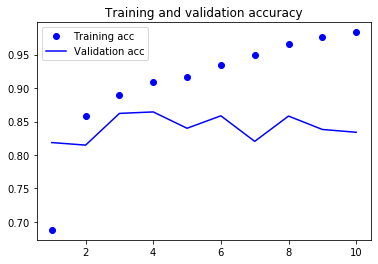

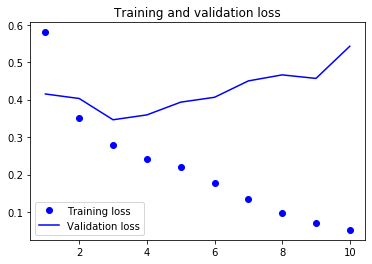

In [103]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

테스트 정확도는 약 85% 이다.
- 원인은 전체 시퀀스가 아닌 순서대로 500개의 단어만 입력에 사용했기 때문이다.
- RNN은 기준 모델보다(3장에서 했던) 얻은 정보가 적음
- SimpleRNN이 긴 시퀀스를 처리하는데 적합하지 않기 때문이다.
- 더 잘 작동하는 다른 방법이 있다.!

### 6.2.2 LSTM과 GRU 층 이해하기

LSTM꽈 GRU가 있는데 실전에서는 항상 이 둘 중에 하나를 사용할거임(GPT가 등장하면...?)
- SimpleRNN은 너무 단순함
- SimpleRNN은 이론적으로 시간 t에서 이전의 모든 타임스텝의 정보를 유지할 수 있지만, 실제로는 긴 시간에 걸친 의존성은 학습할 수 없는 것이 문제
- 층이 많은 인발 네트워크에서 나타나는 것과 비슷한 현상은 vanishing gradient problem(그래디언트 소실 문제) 발생
- 그래서 LSTM과 GRU가 나옴

LSTM 컨셉
- Long Short-Term Memory(장, 단기 메모리)
- 정보를 여러 타임스텝에 걸쳐 나르는 방법이 주가 된다.
- 처리할 시퀀스에 나란히 작동하는 컨베이어 벨트가 있다. -> 시퀀스 어느 지점에서 추출된 정보가 컨베이어 벨트 위로 올라가 필요한 시점의 타임스텝으로 이동하여 떨굼 -> 이것이 LSTM
- 나중을 위해 정보를 저장함으로써 처리 과정에서 오래된 시그널이 점차 소실되는 것을 막음
- 나머지는 책 참고
- https://www.youtube.com/watch?v=bX6GLbpw-A4 (허민석 님 짱!)

In [106]:
from keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(
    optimizer="rmsprop",
    loss='binary_crossentropy',
    metrics=['acc']
)

history=model.fit(
    input_train, y_train,
    epochs=10, batch_size=128, validation_split=0.2
)

/opt/conda/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 32s 2ms/step - loss: 0.5122 - acc: 0.7653 - val_loss: 0.4090 - val_acc: 0.8310
Epoch 2/10
20000/20000 [==============================] - 29s 1ms/step - loss: 0.3237 - acc: 0.8734 - val_loss: 0.2862 - val_acc: 0.8864
Epoch 3/10
20000/20000 [==============================] - 31s 2ms/step - loss: 0.2356 - acc: 0.9113 - val_loss: 0.3496 - val_acc: 0.8808
Epoch 4/10
20000/20000 [==============================] - 32s 2ms/step - loss: 0.2012 - acc: 0.9252 - val_loss: 0.3152 - val_acc: 0.8804
Epoch 5/10
20000/20000 [==============================] - 32s 2ms/step - loss: 0.1728 - acc: 0.9374 - val_loss: 0.2934 - val_acc: 0.8886
Epoch 6/10
20000/20000 [==============================] - 31s 2ms/step - loss: 0.1580 - acc: 0.9416 - val_loss: 0.2978 - val_acc: 0.8760
Epoch 7/10
20000/20000 [==============================] - 31s 2ms/step - loss: 0.1408 - acc: 0.9507 - val_loss: 0.3045 - val_acc:

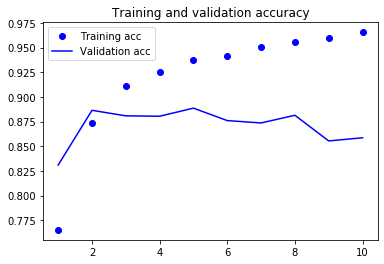

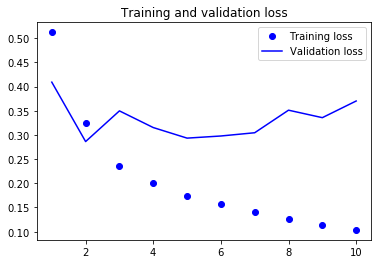

In [107]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

약 88% 정도의 검증 정확도
- SimpleRNN 네크워크보다 더 나음
- LSTM은 그레디언트 소실 문제로부터 덜 영향을 받기 때문

하지만 왜 더 높지 않을까?
- 하이퍼파라미터 튜닝 안 했음
- regularization을 하지 않음
- 사실 더 복잡하 자연어 처리 문제들에서 LSTM이 뛰어남
  - question-answering / machine-translation

## 6.3 순환 신경망의 고급 사용법

온도 예측 문제로 고급 사용법 세 가지를 시연
- 시계열 데이터는 건물 옥상에 설치된 센서에서 취득한 온도, 기압, 습도 등의 데이터
- 이 데이터를 사용하여 마지막 데이터 포인트에서 24시간 이후의 온도를 예측하겠음
- 물론 어려운 점이 많음


**순환 드롭아웃**
- recurrent dropout
- 순환 층에서 과대적합을 방지하기 위해 케라스에 내장되어 있는 드롭아웃을 사용함

**스태킹 순환 층**
- stacking recurrent layer
- 네트워크의 표현 능력(representational power)을 증가(연산 비용 증가)

**양방향 순환 층**
- bidirectional recurrent layer
- 순환 네트워크에 같은 정보를 다른 방향으로 주입 하여 정확도를 높이고 기억을 좀 더 오래 유지 시킴

### 6.3.1 기온 예측 문제

데이터 설명
- 수년간에 걸쳐 기온, 기압, 습도, 풍향 등 14개의 관측치가 10분마다 기록되어 있다.
- 최근 데이터(몇 일치의 데이터 포인트)를 입력으로 사용하여 모델을 만들고 24시간 이후의 기온을 예측

In [120]:
import os

data_dir = './datasets/jena_climate/'
fname = os.path.join(data_dir, 'jena_climate_2009_2016.csv')

with open(fname, 'r') as file:
    data = file.read()

    
lines = data.split('\n')
header = lines[0].split(',')
lines = lines[1:]

print(header)
print(len(lines))

['"Date Time"', '"p (mbar)"', '"T (degC)"', '"Tpot (K)"', '"Tdew (degC)"', '"rh (%)"', '"VPmax (mbar)"', '"VPact (mbar)"', '"VPdef (mbar)"', '"sh (g/kg)"', '"H2OC (mmol/mol)"', '"rho (g/m**3)"', '"wv (m/s)"', '"max. wv (m/s)"', '"wd (deg)"']
420551


In [121]:
# 42aks 551개의 데이터 전체를 넘파이 배열로 바꾸기

import numpy as np

float_data = np.zeros((len(lines), len(header) - 1))

for i, line in enumerate(lines):
    values = [float(x) for x in line.split(',')[1:]]
    float_data[i, :] = values

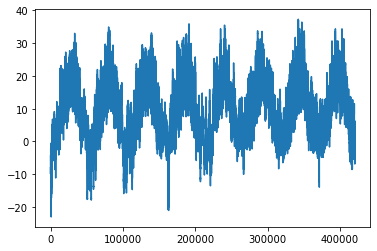

In [122]:
from matplotlib import pyplot as plt

temp = float_data[:, 1] # 온도(섭씨)
plt.plot(range(len(temp)), temp)

기간을 좁혀서 처음 10일간 온도 데이터를 나타낸 그래프 그리기

지난 몇 달간 데이터를 사용하여 다음 달의 평균 온도를 예측하는 문제는 쉬운 편임
- 연간 데이터 주기성은 안정적이기 때문이다.
- 하루 하루 데이터를 살펴보면 온도 변화는 매우 불안정
- 일자별 수준의 시계열 데이터를 예측할 수 있을까...?

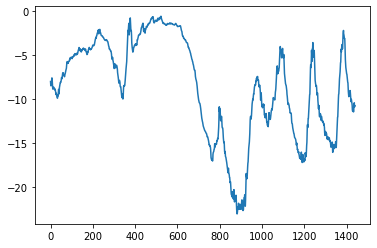

In [123]:
plt.plot(range(1440), temp[:1440])

### 6.3.2 데이터 준비

문제에 대한 정확한 정의
- lookback 타임스텝(하나의 타임스텝은 10분)만큼 이전으로 돌아가서 매 steps 타임스텝마다 샘플링
- 이 데이터를 바탕으로 delay 타임스텝 이후의 온도를 예측할 수 있을까?
- 사용 변수
  - lookback = 1440 : 10일 전 데이터로 돌아감
  - steps = 6 : 1시간 마다 데이터 포인트 하나를 샘플링
  - delay = 144 : 24시간이 지난 데이터가 타깃이 됨
  
시작하기 전 해야 할 것 두 가지
- 신경망에 주입할 수 있는 형태로 데이터 전처리
  - 시계열 특성의 범위가 서로 다름
  - 각 시계열 특성을 개별적으로 정규화하여 비슷한 범위를 가진 작은 값으로 변경
- float_data 배열을 받아 과거 데이터의 배치와 미래 타깃 온도를 추출하는 파이썬 제너레이터 생성
  - 이 데이터셋에 있는 샘플은 중복이 많음(샘플 N과 샘플 N+1은 대부분 타임스텝이 비슷)
  - 모든 샘플을 각기 메모리에 적재하는 것은 낭비가 심하므로 대신에 원본 데이터를 사용하여 그때그때 배치를 만들 것
  
각 시계열 특성에 대해 평균을 빼고 표준 편차로 나누어 전처리

In [124]:
mean = float_data[:200000].mean(axis=0)
float_data -= mean

std = float_data[:200000].std(axis=0)
float_data /= std

제너레이터 생성
- (samples, targets) 튜플을 반복적으로 반환
- samples : 입력 데이터로 사용할 배치
- targets : 이에 대응하는 타깃 온도의 배열

제너레이터 매개 변수
- data : 위의 배열
- lookback : 입력으로 사용하기 위해 거슬러 올라갈 타임스텝
- delay : 타깃으로 사용할 미래의 타임스텝
- min_index & max_index : 추출할 타임스텝의 범위를 지정하기 위한 data 배열의 인덱스. 검증 데이터와 테스트 데이터를 분리하는 데 사용
- shuffle : 샘플을 섞을지, 시간 순서대로 추출할지를 결정
- batch_size : 배치의 샘플 수
- step :  데이터를 샘플링할 타임스텝 간격, 1시간에 하나의 데이터 포인트를 추출하기 위해 6으로 지정

In [132]:
def generator(data, lookback, delay, 
              min_index, max_index, 
              shuffle=False, batch_size=128, step=6):
    if max_index is None:
        max_index = len(data) - delay - 1
    
    i = min_index + lookback
    
    while 1:
        if shuffle:
            rows = np.random.randint(
                min_index + lookback, max_index, size=batch_size
            )
        
        else:
            if i + batch_size >= max_index:
                i = min_index + lookback
            
            rows = np.arange(i, min(i + batch_size, max_index))
            i += len(rows)
        
        samples = np.zeros((len(rows), lookback // step, data.shape[-1]))
        targets = np.zeros((len(rows),))
        
        for j, row in enumerate(rows):
            indices = range(rows[j] - lookback, rows[j], step)
            samples[j] = data[indices]
            targets[j] = data[rows[j] + delay][1]
            
        yield samples, targets

In [148]:
def generator(data, lookback, delay, min_index, max_index,
              shuffle=False, batch_size=128, step=6):
    if max_index is None:
        max_index = len(data) - delay - 1
    i = min_index + lookback
    while 1:
        if shuffle:
            rows = np.random.randint(
                min_index + lookback, max_index, size=batch_size)
        else:
            if i + batch_size >= max_index:
                i = min_index + lookback
            rows = np.arange(i, min(i + batch_size, max_index))
            i += len(rows)

        samples = np.zeros((len(rows),
                           lookback // step,
                           data.shape[-1]))
        targets = np.zeros((len(rows),))
        for j, row in enumerate(rows):
            indices = range(rows[j] - lookback, rows[j], step)
            samples[j] = data[indices]
            targets[j] = data[rows[j] + delay][1]
        yield samples, targets

generator 함수를 사용하여 훈련용, 검증용, 테스트용 3개의 제너레이터 생성
- 각 제너레이터는 원본 데이터에서 다른 시간대를 사용

In [149]:
lookback = 1440
step = 6
delay = 144
batch_size = 128

train_gen = generator(float_data,
                      lookback=lookback,
                      delay=delay,
                      min_index=0,
                      max_index=200000,
                      shuffle=True,
                      step=step, 
                      batch_size=batch_size)

val_gen = generator(float_data,
                    lookback=lookback,
                    delay=delay,
                    min_index=200001,
                    max_index=300000,
                    step=step,
                    batch_size=batch_size)

test_gen = generator(float_data,
                     lookback=lookback,
                     delay=delay,
                     min_index=300001,
                     max_index=None,
                     step=step,
                     batch_size=batch_size)

# 전체 검증 세트를 순회하기 위해 val_gen에서 추출할 횟수
val_steps = (300000 - 200001 - lookback) // batch_size

# 전체 테스트 세트를 순회하기 위해 test_gen에서 추출할 횟수
test_steps = (len(float_data) - 300001 - lookback) // batch_size

상식 수준의 기준점
- 온도 시계열 데이터는 연속성이 있고 일자별로 주기성을 가진다고 가정
- 오늘 온도는 내일 온도와 비슷할 가능성이 높다
- 그렇기 때문에 상식 수준의 해결책은 지금으로부터 24시간 후 온도는 지금과 동일하다고 예측
- 이 방법을 평균 절댓값 오차(MAE)로 평가

```python
np.mean(np.abs(preds - targets))
```

In [150]:
def evaluate_naive_method():
    batch_maes = []
    for step in range(val_steps):
        samples, targets = next(val_gen)
        preds = samples[:, -1, 1]
        mae = np.mean(np.abs(preds - targets))
        batch_maes.append(mae)
    print(np.mean(batch_maes))
    
evaluate_naive_method()

0.2897359729905486


In [151]:
# 출력된 MAE는 0.29입니다. 
# 이 온도 데이터는 평균이 0이고 표준 편차가 1이므로 결괏값이 바로 와 닿지는 않습니다. 
# 평균 절댓값 오차 0.29에 표준 편차를 곱하면 섭씨 2.57°C가 됩니다

0.29 * std[1]

2.5672247338393395

### 6.3.4 기본적인 머신 러닝 방법

소규모 모델을 만들고 그 다음에 점진적으로 키워 나가는 방식

In [137]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.Flatten(
    input_shape = (lookback // step, float_data.shape[-1])
))

model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1))

model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(
    train_gen,
    steps_per_epoch=500,
    epochs=20,
    validation_data=val_gen,
    validation_steps=val_steps
)

Epoch 1/20
500/500 [==============================] - 11s 23ms/step - loss: 1.1321 - val_loss: 0.5480
Epoch 2/20
500/500 [==============================] - 9s 19ms/step - loss: 0.3582 - val_loss: 0.4625
Epoch 3/20
500/500 [==============================] - 10s 19ms/step - loss: 0.2846 - val_loss: 0.2792
Epoch 4/20
500/500 [==============================] - 10s 21ms/step - loss: 0.2643 - val_loss: 0.2979
Epoch 5/20
500/500 [==============================] - 10s 19ms/step - loss: 0.2512 - val_loss: 0.3779
Epoch 6/20
500/500 [==============================] - 10s 20ms/step - loss: 0.2425 - val_loss: 0.3060
Epoch 7/20
500/500 [==============================] - 10s 20ms/step - loss: 0.2352 - val_loss: 0.5766
Epoch 8/20
500/500 [==============================] - 11s 21ms/step - loss: 0.2306 - val_loss: 0.2481
Epoch 9/20
500/500 [==============================] - 10s 20ms/step - loss: 0.2264 - val_loss: 0.4701
Epoch 10/20
500/500 [==============================] - 10s 21ms/step - loss: 0.2226

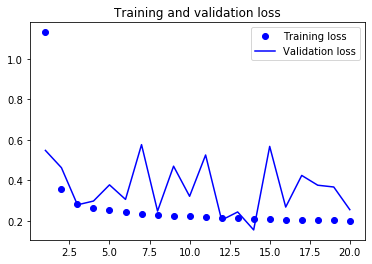

In [138]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

기준을 앞서기가 쉽지 않음
- 상식에는 머신 러닝이 찾지 못한 것들이 있음

> 간단하고 괜찮은 성능을 내는 모델(상식 수준의 기준 모델)이 데이터와 타깃을 매핑할 수 있다면 왜 훈련한 모델은 이를 찾지 못하고 성능이 낮을까요? 훈련 과정이 찾는 것은 간단한 이 모델이 아니기 때문입니다. 문제 해결을 위해 탐색하는 모델의 공간, 즉 가설 공간은 우리가 매개변수로 설정한 두 개 층을 가진 네트워크의 모든 가능한 가중치의 조합입니다. 이 네트워크는 이미 매우 복잡합니다. 복잡한 모델 공간에서 해결책을 탐색할 때 간단하고 괜찮은 성능을 내는 모델은 찾지 못할 수 있습니다. 심지어 기술적으로 봤을 때 이 가설 공간에 포함되어 있을 때 조차도 말이죠. 이것이 일반적으로 머신 러닝이 가진 심각한 제약 사항입니다. 학습 알고리즘이 특정한 종류의 간단한 모델을 찾도록 하드코딩되지 않았다면, 모델 파라미터를 학습하는 방법은 간단한 문제를 위한 간단한 해결책을 찾지 못할 수 있습니다.

#### 첫 번째 순환 신경망

앞선 모델은 시계열 데이터를 펼쳤지 때문에 입력 데이터에서 시간 개념을 상실
- 대신 인과 관계와 순서가 의미 있는 시퀀스 데이터를 그대로 사용하는 전략
- 이런 시퀀스 데이터에 아주 잘 들어맞는 순환 시퀀스 처리 모델 시도
- 이 모델은 앞선 모델과 달리 데이터 포인터의 시간 순서를 사용

GRU 층은 LSTM과 같은 원리로 작동하지만 조금 더 간결하고 그래서 계산 비용이 덜 듬
- 계산 비용과 표현 학습 능력 사이의 트레이드오프 존재

In [153]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.GRU(32, input_shape=(None, float_data.shape[-1])))
model.add(layers.Dense(1))

model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_gen,
                              steps_per_epoch=500,
                              epochs=20,
                              validation_data=val_gen,
                              validation_steps=val_steps)

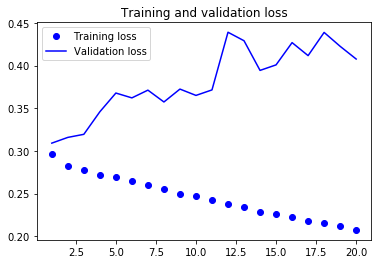

In [140]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### 6.3.6 과대적합을 감소하기 위해 순환 드롭아웃 사용하기

훈련 손실과 검증 손실 곡선을 보면 모델이 과대적합인지 알 수 있음
- 몇 번의 에포크 이후에 훈련 손실과 검증 손실이 현저하게 벌어짐
- 드롭아웃 기법
  - 훈련 데이터를 층에 주입할 때 데이터에 있는 우연한 상관관계를 깨뜨리기 위해 입력 층의 유닛을 랜덤하게 끄는 기법
  - 순환 신경망에 드롭아웃을 올바르게 적용하는 방법은 간단하지 않음
  - 순환 층 이전에 드롭아웃을 적용하면 규제에 도움이 되는 것보다 학습에 더 방해되는 것으로 알려짐

타입스텝마다 랜덤하게 드롭아웃 마스크를 바꾸는 것이 아니라 동일한 드롭아웃 마스크(동일한 유닛의 드롭 패턴)를 모든 타임스텝에 적용해야 함
- GRU나 LSTM 같은 순환 게이트에 의해 만들어지는 표현을 규제하려면 순환 층 내부 계산에 사용된 활성화 함수에 타임스텝마다 동일한 드롭아웃 마스크를 적용해야 함(순환 드롭 아웃 마스크)
- 모든 타임스텝에 동일한 드롭 아웃 마스크를 적용하면 네트워크가 학습 오차를 타임스텝에 걸쳐 적절하게 전파
- 타임스텝마다 랜덤한 드롭아웃 마스크를 적용하면 오차 신호가 전파된느 것을 방해하고 학습 과정에 해가 됨


케라스에 있는 모든 순환 층은 2개의 드롭아웃 매개변수 존재
- dropout 층의 입력에 대한 드롭아웃 비율을 정하는 부동 소수 값
- recurrent_dropout은 순환 상태의 드롭아웃 비율을 정함

In [155]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.GRU(32,
                     dropout=0.2,
                     recurrent_dropout=0.2,
                     input_shape=(None, float_data.shape[-1])))
model.add(layers.Dense(1))

model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_gen,
                              steps_per_epoch=500,
                              epochs=40,
                              validation_data=val_gen,
                              validation_steps=val_steps)

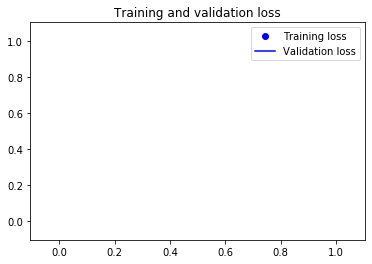

In [142]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### 6.3.7 스태킹 순환 층

> 과대적합은 더 이상 없지만 성능상의 병목이 있는 것 같으므로 네트워크의 용량을 늘려야 합니다. 일반적인 머신 러닝 작업 흐름을 기억하세요. (드롭아웃 등을 사용하여 과대적합을 줄이는 기본 단계를 거쳤다고 가정하고) 과대적합이 일어날 때까지 네트워크의 용량을 늘리는 것이 좋습니다. 너무 많이 과대적합되지 않는 한 아직 충분한 용량에 도달한 것이 아닙니다.

> 네트워크의 용량을 늘리려면 일반적으로 층에 있는 유닛의 수를 늘리거나 층을 더 많이 추가합니다. 순환 층 스태킹은 더 강력한 순환 네트워크를 만드는 고전적인 방법입니다. 예를 들어 구글 번역 알고리즘의 현재 성능은 7개의 대규모 LSTM 층을 쌓은 대규모 모델에서 나온 것입니다.

> 케라스에서 순환 층을 차례대로 쌓으려면 모든 중간 층은 마지막 타임스텝 출력만이 아니고 전체 시퀀스(3D 텐서)를 출력해야 합니다. return_sequences=True로 지정하면 됩니다:

In [146]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.GRU(32,
                     dropout=0.1,
                     recurrent_dropout=0.5,
                     return_sequences=True,
                     input_shape=(None, float_data.shape[-1])))
model.add(layers.GRU(64, activation='relu',
                     dropout=0.1, 
                     recurrent_dropout=0.5))
model.add(layers.Dense(1))

model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_gen,
                              steps_per_epoch=500,
                              epochs=40,
                              validation_data=val_gen,
                              validation_steps=val_steps)

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

층을 추가하여 성능을 조금 향상시켰지만 크지는 않음
- 아직 충분히 과대적합을 만들지 못했기 때문에 검증 손실을 향상하기 위해서 층의 크기를 늘릴 수 있다. 하지만 계산 비용이 추가 됨
- 층을 추가한 만큼 도움이 되지 않았으므로, 여기서는 네트워크의 용량을 늘리는 것이 도움이 되지 않는다고 볼 수 있다.

### 6.3.8 양방향 RNN 사용하기

> 이 절에서 소개할 마지막 기법은 양방향 RNN입니다. 양방향 RNN은 RNN의 한 변종이고 특정 작업에서 기본 RNN 보다 훨씬 좋은 성능을 냅니다. 자연어 처리에서는 맥가이버 칼이라고 할 정도로 즐겨 사용됩니다.

>RNN은 특히 순서 또는 시간에 민감합니다. 즉, 입력 시퀀스의 타입스텝 순서대로 처리합니다. 타입스텝을 섞거나 거꾸로 하면 RNN이 시퀀스에서 학습하는 표현을 완전히 바꾸어 버립니다. 이는 온도 예측과 같이 순서에 의미가 있는 문제에 잘 맞는 이유이기도 합니다. 양방향 RNN은 RNN이 순서에 민감하다는 성질을 사용합니다. 앞서 보았던 GRU나 LSTM 같은 RNN 두 개를 사용합니다. 각 RNN은 입력 시퀀스를 한 방향(시간의 순서나 반대 순서)으로 처리한 다음 각 표현을 합칩니다. 시퀀스를 양쪽 방향으로 처리하기 때문에 양방향 RNN은 단방향 RNN이 놓치기 쉬운 패턴을 감지할 수 있습니다.

>놀랍게도 이 절에 있는 RNN 층이 시간의 순서대로 (오래된 타임스텝이 먼저 나오도록) 시퀀스를 처리하는 것은 근거 없는 결정입니다. 적어도 이 결정을 궁금해하지 않았습니다. 시간의 반대 방향으로 (최근 타임스텝이 먼저 나오도록) 입력 시퀀스를 처리하면 만족할만한 RNN 성능을 낼 수 있을까요? 실제 이렇게 해 보고 결과가 어떤지 확인해 보죠. 해야 할 일은 입력 시퀀스를 시간 차원을 따라 거꾸로 생성하는 데이터 제너레이터 만드는 것 뿐입니다(제너레이터 함수의 마지막 줄을 yield samples[:, ::-1, :], targets로 바꿉니다). 이 절의 첫 번째 예제와 동일하게 하나의 GRU 층을 가진 네트워크를 훈련합니다:

In [156]:
def reverse_order_generator(data, lookback, delay, min_index, max_index,
                            shuffle=False, batch_size=128, step=6):
    if max_index is None:
        max_index = len(data) - delay - 1
    i = min_index + lookback
    while 1:
        if shuffle:
            rows = np.random.randint(
                min_index + lookback, max_index, size=batch_size)
        else:
            if i + batch_size >= max_index:
                i = min_index + lookback
            rows = np.arange(i, min(i + batch_size, max_index))
            i += len(rows)

        samples = np.zeros((len(rows),
                           lookback // step,
                           data.shape[-1]))
        targets = np.zeros((len(rows),))
        for j, row in enumerate(rows):
            indices = range(rows[j] - lookback, rows[j], step)
            samples[j] = data[indices]
            targets[j] = data[rows[j] + delay][1]
        yield samples[:, ::-1, :], targets
        
train_gen_reverse = reverse_order_generator(
    float_data,
    lookback=lookback,
    delay=delay,
    min_index=0,
    max_index=200000,
    shuffle=True,
    step=step, 
    batch_size=batch_size)
val_gen_reverse = reverse_order_generator(
    float_data,
    lookback=lookback,
    delay=delay,
    min_index=200001,
    max_index=300000,
    step=step,
    batch_size=batch_size)

In [157]:
model = Sequential()
model.add(layers.GRU(32, input_shape=(None, float_data.shape[-1])))
model.add(layers.Dense(1))

model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_gen_reverse,
                              steps_per_epoch=500,
                              epochs=20,
                              validation_data=val_gen_reverse,
                              validation_steps=val_steps)

Epoch 1/20
500/500 [==============================] - 68s 137ms/step - loss: 0.4724 - val_loss: 0.1581
Epoch 2/20
500/500 [==============================] - 66s 131ms/step - loss: 0.4352 - val_loss: 0.2205
Epoch 3/20
500/500 [==============================] - 67s 133ms/step - loss: 0.3886 - val_loss: 0.1614
Epoch 4/20
500/500 [==============================] - 67s 134ms/step - loss: 0.3572 - val_loss: 0.1288
Epoch 5/20
500/500 [==============================] - 66s 131ms/step - loss: 0.3357 - val_loss: 0.2100
Epoch 6/20
500/500 [==============================] - 68s 137ms/step - loss: 0.3242 - val_loss: 0.2344
Epoch 7/20
500/500 [==============================] - 66s 132ms/step - loss: 0.3092 - val_loss: 0.2736
Epoch 8/20
500/500 [==============================] - 67s 134ms/step - loss: 0.3000 - val_loss: 0.2290
Epoch 9/20
500/500 [==============================] - 68s 137ms/step - loss: 0.2899 - val_loss: 0.3110
Epoch 10/20
500/500 [==============================] - 65s 130ms/step - l

In [ ]:
# loss = history.history['loss']
# val_loss = history.history['val_loss']

# epochs = range(1, len(loss) + 1)

# plt.figure()

# plt.plot(epochs, loss, 'bo', label='Training loss')
# plt.plot(epochs, val_loss, 'b', label='Validation loss')
# plt.title('Training and validation loss')
# plt.legend()

# plt.show()

> 순서를 뒤집은 GRU는 상식 수준의 기준점보다도 성능이 낮습니다. 이 경우에는 시간 순서대로 처리하는 것이 중요한 역할을 합니다. 사실 이는 당연합니다. 기본적인 GRU 층은 먼 과거보다 최근 내용을 잘 기억합니다. 또한, 최근에 가까운 날씨 데이터 포인트일수록 오래된 데이터 포인트보다 예측에 유용합니다(상식 수준의 기준점이 꽤 강력한 이유입니다). 시간 순서대로 처리하는 네트워크가 거꾸로 처리하는 것보다 성능이 높아야만 합니다. 하지만 자연어 처리를 포함하여 다른 많은 문제에서는 그렇지 않습니다. 문장을 이해하는데 있어서 단어의 중요성은 단어가 문장 어디에 놓여 있는지에 따라 결정되지 않습니다. 같은 기법을 이전 절의 LSTM IMDB 예제에 적용해 보죠:



In [158]:
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras import layers
from keras.models import Sequential

# 특성으로 사용할 단어의 수
max_features = 10000
# 사용할 텍스트의 길이(가장 빈번한 max_features 개의 단어만 사용합니다)
maxlen = 500

# 데이터 로드
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)


# 시퀀스를 뒤집습니다
x_train = [x[::-1] for x in x_train]
x_test = [x[::-1] for x in x_test]

# 시퀀스에 패딩을 추가합니다
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

model = Sequential()
model.add(layers.Embedding(max_features, 128))
model.add(layers.LSTM(32))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

/opt/conda/lib/python3.7/site-packages/keras/datasets/imdb.py:101: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/opt/conda/lib/python3.7/site-packages/keras/datasets/imdb.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])
/opt/conda/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 58s 3ms/step - loss: 0.4886 - accuracy: 0.7661 - val_loss: 0.4987 - val_accuracy: 0.8156
Epoch 2/10
20000/20000 [==============================] - 64s 3ms/step - loss: 0.3136 - accuracy: 0.8806 - val_loss: 0.3541 - val_accuracy: 0.8734
Epoch 3/10
20000/20000 [==============================] - 66s 3ms/step - loss: 0.2544 - accuracy: 0.9049 - val_loss: 0.3142 - val_accuracy: 0.8742
Epoch 4/10
20000/20000 [==============================] - 61s 3ms/step - loss: 0.2104 - accuracy: 0.9234 - val_loss: 0.3837 - val_accuracy: 0.8420
Epoch 5/10
20000/20000 [==============================] - 56s 3ms/step - loss: 0.1865 - accuracy: 0.9358 - val_loss: 0.4439 - val_accuracy: 0.8554
Epoch 6/10
20000/20000 [==============================] - 58s 3ms/step - loss: 0.1728 - accuracy: 0.9406 - val_loss: 0.4215 - val_accuracy: 0.8200
Epoch 7/10
20000/20000 [==============================] - 58s 3ms/ste

시간 순서로 훈련한 LSTM과 거의 동일한 성능
- 텍스트 데이터셋에는 순서를 뒤집어 처리하는 것이 시간 순서대로 처리하는 것과 거의 동일하게 잘 작동
- 언어를 이해하는 데 단어의 순서가 중요하지만 결정적이지 않다는 가정을 뒷받침
- 거꾸로 된 시퀀스에서 훈련한 RNN은 원래 시퀀스에서 훈련한 것과는 다른 표현을 학습
- 앙상블 개념으로 접근 가능해짐

![alt text](https://s3.amazonaws.com/book.keras.io/img/ch6/bidirectional_rnn.png)

케라스에서는 Bidirectional 층을 사용하여 양방향 RNN을 만듬
- 첫 번째 매개변수로 순환 층의 객체를 전달 받음
- Bidirectional 클래스는 전달받은 순환 층으로 새로운 두 번째 객체를 만듬
- 하나는 시간 순서대로 입력 시퀀스를 처리하고, 다른 하나는 반대 순서로 입력 시퀀스 처리

In [159]:
from keras import backend as K

K.clear_session()

In [160]:
model = Sequential()
model.add(layers.Embedding(max_features, 32))
model.add(layers.Bidirectional(layers.LSTM(32)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(
    optimizer='rmsprop', 
    loss='binary_crossentropy', 
    metrics=['accuracy']
)

history = model.fit(
    x_train, y_train, epochs=10, 
    batch_size=128, validation_split=0.2
)

/opt/conda/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 44s 2ms/step - loss: 0.5880 - accuracy: 0.6933 - val_loss: 0.4215 - val_accuracy: 0.8310
Epoch 2/10
20000/20000 [==============================] - 43s 2ms/step - loss: 0.3783 - accuracy: 0.8442 - val_loss: 0.3333 - val_accuracy: 0.8758
Epoch 3/10
20000/20000 [==============================] - 44s 2ms/step - loss: 0.2851 - accuracy: 0.8913 - val_loss: 0.3317 - val_accuracy: 0.8814
Epoch 4/10
20000/20000 [==============================] - 43s 2ms/step - loss: 0.2428 - accuracy: 0.9103 - val_loss: 0.3881 - val_accuracy: 0.8652
Epoch 5/10
20000/20000 [==============================] - 44s 2ms/step - loss: 0.2039 - accuracy: 0.9277 - val_loss: 0.4570 - val_accuracy: 0.8612
Epoch 6/10
20000/20000 [==============================] - 45s 2ms/step - loss: 0.1858 - accuracy: 0.9337 - val_loss: 0.3065 - val_accuracy: 0.8846
Epoch 7/10
20000/20000 [==============================] - 44s 2ms/ste

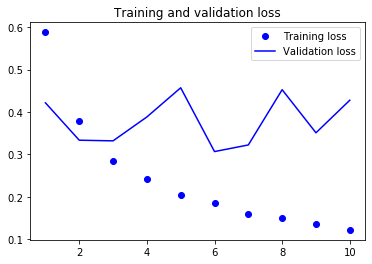

In [161]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [162]:
# 온도 예측 문제 적용

from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.Bidirectional(
    layers.GRU(32), input_shape=(None, float_data.shape[-1])))
model.add(layers.Dense(1))

model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_gen,
                              steps_per_epoch=500,
                              epochs=40,
                              validation_data=val_gen,
                              validation_steps=val_steps)

Epoch 1/40
500/500 [==============================] - 79s 159ms/step - loss: 0.2985 - val_loss: 0.3642
Epoch 2/40
500/500 [==============================] - 77s 155ms/step - loss: 0.2760 - val_loss: 0.3572
Epoch 3/40
500/500 [==============================] - 79s 157ms/step - loss: 0.2696 - val_loss: 0.2835
Epoch 4/40
500/500 [==============================] - 78s 156ms/step - loss: 0.2646 - val_loss: 0.4134
Epoch 5/40
500/500 [==============================] - 78s 155ms/step - loss: 0.2606 - val_loss: 0.4130
Epoch 6/40
500/500 [==============================] - 76s 152ms/step - loss: 0.2531 - val_loss: 0.5410
Epoch 7/40
500/500 [==============================] - 75s 151ms/step - loss: 0.2494 - val_loss: 0.5211
Epoch 8/40
500/500 [==============================] - 76s 152ms/step - loss: 0.2421 - val_loss: 0.5043
Epoch 9/40
500/500 [==============================] - 76s 152ms/step - loss: 0.2379 - val_loss: 0.4008
Epoch 10/40
500/500 [==============================] - 79s 158ms/step - l

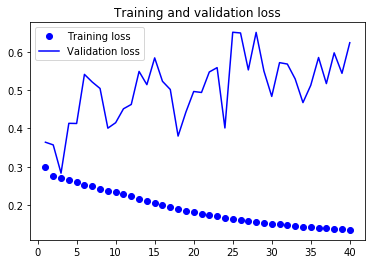

In [163]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### 6.3.9 더 나아가서...

온도 예측 문제의 성능 향상을 위해 시도해 볼 수 있는 것

- 스태킹한 각 순환 층의 유닛 수를 조정합니다. 지금 설정은 대부분 임의로 한 것이라 최적화가 덜 되었을 것입니다.
- RMSprop 옵티마이저가 사용한 학습률을 조정합니다.
- GRU 대신 LSTM 층을 사용합니다.
- 순환 층 위에 용량이 큰 완전 연결된 회귀 층을 사용합니다. 즉 유닛 수가 많은 Dense 층이나 Dense 층을 스태킹합니다.
- 최종적으로 (검증 MAE 기준으로 봤을 때) 최선의 모델을 테스트 세트에서 확인해야 합니다. 이를 잊으면 검증 세트에 과대적합된 네트워크 구조를 만들게 될 것입니다.

### 6.3.10 정리

- 4장에서 처음 배웠던 것처럼 새로운 문제를 해결할 때는 선택한 지표에서 상식 수준의 기준점을 설정하는 것이 좋다.
- 계산 비용을 추가할지 판단하기 위해서 비용이 비싼 모델 전에 간단한 모델을 시도
- 시간 순서가 중요한 데이터가 있다면 순환 층이 적합
- 시계열 데이터를 펼쳐서 처리하는 모델의 성능을 앞지를 것
- 순환 네트워크에 드롯아웃을 사용하려면 타임스텝 동안 일정한 드롭아웃 마스크와 순환 드롭아웃 마스크를 사용해야함. 둘 다 케라스 순환 층에 포함 되어 있음
  - 순환 층에 있는 dropout과 recurrent_dropout 매개변수를 사용
- 스태킹 RNN은 단일 RNN층보다 더 강력한 표현 능력 제공 - 하지만 계산 비용이 많이 들기 때문에 항상 시도할 가치가 있지는 않음, 복잡한 문제에 좀 더 적합
- 양방향으로 시퀀스를 바라보는 양방향 RNN은 자연어 처리 문제에 유용
  - 하지만 최근의 정보가 오래된 것보다 훨씬 의미 있는 시퀀스 데이터에는 잘 작동하지 않음
  
  
더 공부할 거리
- 순환 어텐션, 시퀀스

### 6.4 컨브넷을 사용한 시퀀스 처리

컨브넷의 특징이 시퀀스 처리와도 관련 있음
- 시간을 2D 이미지의 높이와 너비 같은 공간의 차원으로 다룰 수 있음

1D 컨브넷은 특정 시퀀스 처리 문제에서 RNN과 견줄만함
- 일반적으로 계산 비용이 훨씬 싸다
- 1D 컨브넷은 전형적으로 팽창된 커널(dilated kernel)과 함께 사용
  - dilated convolution 은 커널에 구멍을 추가하여 입력을 건너뛰면서 합성곱하는 것과 같다.
  - 케라스에서는 Conv1D와 Cond2D의 dilation_rate 매개변수에서 팽창 비율을 지정할 수 있음
  - 팽창 합성곱은 이미지 분할(image segementation) 분야 등에 많이 사용
- 오디오와 기계 번역 분야에서 좋은 성과. 텍스트 분류나 시계열 예측 같은 간단한 문제에서도 괜찮음

#### 6.4.1 시퀀스 데이터를 위한 1D 합성곱 이해하기

시퀀스에서 1D 패치(부분 시퀀스)를 추출 하여 1D 합성곱을 적용

![alt text](https://miro.medium.com/max/860/1*h04GCG6MCv1xqNiqJXAUEA.png)

1D 합성곱 층은 시퀀스에 있는 지역 패턴을 인식할 수 있음
- 동일한 변환이 시퀀스에 있는 모든 패치에 적용되기 때문에 특정 위치에서 학습한 패턴을 나중에 다른 위치에서 인식할 수 있음
- 이는 1D 컨브넷에 (시간의 이동에 대한) 이동 불편성(translation invariant)을 제공
  - 예를 들어 크기 5인 윈도우를 사용하여 문자 시퀀스를 처리하는 1D 컨브넷은 5개 이하의 단어나 단어의 부분을 학습, 이 컨브넷은 이 단어가 입력 시퀀스의 어느 문장에 있더라도 인식할 수 있음. 따라서 문자 수준의 1D 컨브넷은 단어 형태학(word morphology)에 관해 학습 가능

#### 6.4.2 시퀀스 데이터를 위한 1D 풀링

컨브넷에서 이미지 텐서의 크기를 다운샘플링 하기 위해 사용하는 average pooling, max pooling 같은 2D 풀링 연산 배움
- 1D 풀링 연산도 동일 -> 입력에서 1D 패치(부분 시퀀스)를 추출하고 최댓값을 출력하거나 평균값을 출력
- 1D의 입력 길이를 줄이기 위해 사용

#### 6.4.3 1D 컨브넷 구현

> 케라스에서 1D 컨브넷은 Conv1D 층을 사용하여 구현합니다. Conv1D는 Conv2D와 인터페이스가 비슷합니다. (samples, time, features) 크기의 3D 텐서를 입력받고 비슷한 형태의 3D 텐서를 반환합니다. 합성곱 윈도우는 시간 축의 1D 윈도우입니다. 즉, 입력 텐서의 두 번째 축입니다.

In [173]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000
max_len = 500

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(x_train.shape)
print(x_test.shape)

(25000,)
(25000,)


In [169]:
x_train[0][0:10]

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65]

In [174]:
x_train

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

In [175]:
# 시퀀스 패딩 - 리스트를 (samples, maxlen) 크기의 2D 정수 텐서로 변환

x_train = sequence.pad_sequences(x_train, maxlen=max_len)
x_test = sequence.pad_sequences(x_test, maxlen=max_len)

print(x_train.shape)
print(x_test.shape)

(25000, 500)
(25000, 500)


In [176]:
x_train

array([[   0,    0,    0, ...,   19,  178,   32],
       [   0,    0,    0, ...,   16,  145,   95],
       [   0,    0,    0, ...,    7,  129,  113],
       ...,
       [   0,    0,    0, ...,    4, 3586,    2],
       [   0,    0,    0, ...,   12,    9,   23],
       [   0,    0,    0, ...,  204,  131,    9]], dtype=int32)

1D 컨브넷 구성
- Conv1D와 MaxPooling1D 층을 쌓기
- 전역 풀링층(GlobalAveragePooling1D) 이나 Flatten 층으로 마침
  - GlobalAveragePooling1D -> (samples, timesteps, features) 크기의 텐서를 입력 받고 (samples, features) 크기의 텐서를 출력. 즉 시간 축 전체에 풀링을 적용
  - GlobalAveragePooling2D -> (samples, height, width, channels) 크기의 텐서를 입력 받고 (samples, channels) 크기의 텐서를 출력, 즉 특성 맵의 공간 차원 전체에 대한 풀링
- 이 구조는 3D 입력을 2D 출력으로 바꾸므로 분류나 회귀를 위해 모델에 하나 이상의 Dense층을 추가 할 수 있음
- 특이사항은 큰 합성곱 윈도우를 사용할 수 있음
  - 3X3 = 9 같이 특성을 2D에서 고려했다면, 1D 합성곱 층에서는 크기 3인 합성곱 윈도우는 3개의 특성만 고려, 즉 7개나 9개도 가능해짐

In [178]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.Embedding(
    max_features, 128, input_length=max_len
))

model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.MaxPooling1D(5))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(1))

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 500, 128)          1280000   
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 494, 32)           28704     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 98, 32)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 92, 32)            7200      
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 1,315,937
Trainable params: 1,315,937
Non-trainable params: 0
____________________________________________

In [179]:
model.compile(optimizer=RMSprop(lr=1e-4),
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

/opt/conda/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 31s 2ms/step - loss: 0.8065 - acc: 0.5155 - val_loss: 0.6866 - val_acc: 0.5498
Epoch 2/10
20000/20000 [==============================] - 29s 1ms/step - loss: 0.6680 - acc: 0.6464 - val_loss: 0.6630 - val_acc: 0.6518
Epoch 3/10
20000/20000 [==============================] - 32s 2ms/step - loss: 0.6257 - acc: 0.7390 - val_loss: 0.6137 - val_acc: 0.7218
Epoch 4/10
20000/20000 [==============================] - 29s 1ms/step - loss: 0.5378 - acc: 0.7969 - val_loss: 0.5007 - val_acc: 0.7974
Epoch 5/10
20000/20000 [==============================] - 28s 1ms/step - loss: 0.4169 - acc: 0.8421 - val_loss: 0.4248 - val_acc: 0.8344
Epoch 6/10
20000/20000 [==============================] - 29s 1ms/step - loss: 0.3545 - acc: 0.8632 - val_loss: 0.4219 - val_acc: 0.8350
Epoch 7/10
20000/20000 [==============================] - 29s 1ms/step - loss: 0.3112 - acc: 0.8662 - val_loss: 0.4086 - val_acc:

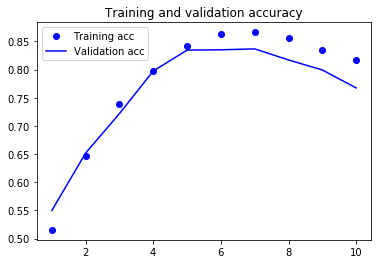

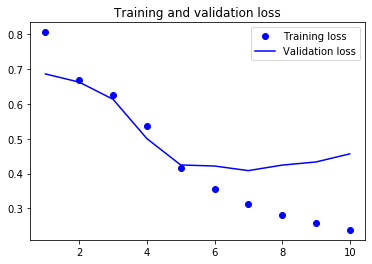

In [180]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

#### 6.4.4 CNN과 RNN을 연결하여 긴 시퀀스를 처리하기

>1D 컨브넷이 입력 패치를 독립적으로 처리하기 때문에 RNN과 달리 (합성곱 윈도우 크기의 범위를 넘어선) 타임스텝의 순서에 민감하지 않습니다. 물론 장기간 패턴을 인식하기 위해 많은 합성곱 층과 풀링 층을 쌓을 수 있습니다. 상위 층은 원본 입력에서 긴 범위를 보게 될 것입니다. 이런 방법은 순서를 감지하기엔 부족합니다. 온도 예측 문제에 1D 컨브넷을 적용하여 이를 확인해 보겠습니다. 이 문제는 순서를 감지해야 좋은 예측을 만들어 낼 수 있습니다. 다음은 이전에 정의한 float_data, train_gen, val_gen, val_steps를 다시 사용합니다:

In [181]:
layers.Conv1D?

Init signature:
layers.Conv1D(
    filters,
    kernel_size,
    strides=1,
    padding='valid',
    data_format='channels_last',
    dilation_rate=1,
    activation=None,
    use_bias=True,
    kernel_initializer='glorot_uniform',
    bias_initializer='zeros',
    kernel_regularizer=None,
    bias_regularizer=None,
    activity_regularizer=None,
    kernel_constraint=None,
    bias_constraint=None,
    **kwargs,
)
Docstring:     
1D convolution layer (e.g. temporal convolution).

This layer creates a convolution kernel that is convolved
with the layer input over a single spatial (or temporal) dimension
to produce a tensor of outputs.
If `use_bias` is True, a bias vector is created and added to the outputs.
Finally, if `activation` is not `None`,
it is applied to the outputs as well.

When using this layer as the first layer in a model,
provide an `input_shape` argument (tuple of integers or `None`, does not
include the batch axis), e.g. `input_shape=(10, 128)` for time series
sequence

In [183]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.Conv1D(32, 5, activation='relu',
                        input_shape=(None, float_data.shape[-1])))
model.add(layers.MaxPooling1D(3))
model.add(layers.Conv1D(32, 5, activation='relu'))
model.add(layers.MaxPooling1D(3))
model.add(layers.Conv1D(32, 5, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(1))

model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_gen,
                              steps_per_epoch=500,
                              epochs=20,
                              validation_data=val_gen,
                              validation_steps=val_steps)

Epoch 1/20
500/500 [==============================] - 21s 42ms/step - loss: 0.4152 - val_loss: 0.1300
Epoch 2/20
500/500 [==============================] - 19s 38ms/step - loss: 0.3597 - val_loss: 0.1641
Epoch 3/20
500/500 [==============================] - 19s 39ms/step - loss: 0.3344 - val_loss: 0.1712
Epoch 4/20
500/500 [==============================] - 19s 39ms/step - loss: 0.3176 - val_loss: 0.1728
Epoch 5/20
500/500 [==============================] - 18s 37ms/step - loss: 0.3075 - val_loss: 0.1919
Epoch 6/20
500/500 [==============================] - 18s 36ms/step - loss: 0.2971 - val_loss: 0.1865
Epoch 7/20
500/500 [==============================] - 18s 37ms/step - loss: 0.2891 - val_loss: 0.1958
Epoch 8/20
500/500 [==============================] - 20s 39ms/step - loss: 0.2813 - val_loss: 0.1541
Epoch 9/20
500/500 [==============================] - 20s 40ms/step - loss: 0.2754 - val_loss: 0.2482
Epoch 10/20
500/500 [==============================] - 18s 36ms/step - loss: 0.269

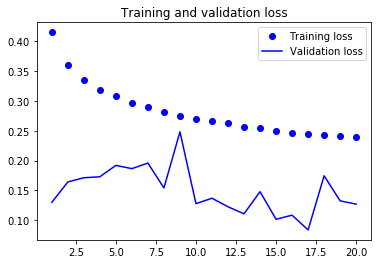

In [184]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [185]:
# 이전에는 6이었습니다(시간마다 1 포인트); 이제는 3 입니다(30분마다 1 포인트)
step = 3
lookback = 1440  # 변경 안 됨
delay = 144 # 변경 안 됨

train_gen = generator(float_data,
                      lookback=lookback,
                      delay=delay,
                      min_index=0,
                      max_index=200000,
                      shuffle=True,
                      step=step)
val_gen = generator(float_data,
                    lookback=lookback,
                    delay=delay,
                    min_index=200001,
                    max_index=300000,
                    step=step)
test_gen = generator(float_data,
                     lookback=lookback,
                     delay=delay,
                     min_index=300001,
                     max_index=None,
                     step=step)
val_steps = (300000 - 200001 - lookback) // 128
test_steps = (len(float_data) - 300001 - lookback) // 128

In [187]:
model = Sequential()
model.add(layers.Conv1D(32, 5, activation='relu',
                        input_shape=(None, float_data.shape[-1])))
model.add(layers.MaxPooling1D(3))
model.add(layers.Conv1D(32, 5, activation='relu'))
model.add(layers.GRU(32, dropout=0.1, recurrent_dropout=0.5))
model.add(layers.Dense(1))

model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_10 (Conv1D)           (None, None, 32)          2272      
_________________________________________________________________
max_pooling1d_6 (MaxPooling1 (None, None, 32)          0         
_________________________________________________________________
conv1d_11 (Conv1D)           (None, None, 32)          5152      
_________________________________________________________________
gru_3 (GRU)                  (None, 32)                6240      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 33        
Total params: 13,697
Trainable params: 13,697
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# loss 문제 있음 - https://github.com/keras-team/keras/issues/2134
# input 문제인데....

model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_gen,
                              steps_per_epoch=500,
                              epochs=20,
                              validation_data=val_gen,
                              validation_steps=val_steps)